In [5]:
# install persim
! pip install persim

     |████████████████████████████████| 47 kB 3.3 MB/s 
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18119 sha256=808df14186feeb756b21ee0b4031c67294d4115a70ed9c8b22e42b4785b02ad7
  Stored in directory: /root/.cache/pip/wheels/d2/9f/a8/67f1b86e47cd17338d3d07939f4660378e65b758c4594f96e3
Successfully built hopcroftkarp


In [6]:
# necessary imports
import numpy as np
import matplotlib.pyplot as plt
from persim import plot_diagrams
from persim import PersistenceImager
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
import pickle
from urllib.request import urlopen
from io import BytesIO

In [8]:
# download data to variables
url = "https://github.com/LuisScoccola/emalca-applied-topology-minicourse/blob/main/data/poseClassificationPickle?raw=true"
f = urlopen(url)
meshes, dgmsSub0, dgmsSub1 = pickle.load(f)

In [19]:
# define functions to plot
def plotPCfn(VPos, fn, cmap = 'afmhot'):
    """
    plot an XY slice of a mesh with the scalar function used in a 
    sublevelset filtration
    """
    x = fn - np.min(fn)
    x = x/np.max(x)
    c = plt.get_cmap(cmap)
    C = c(np.array(np.round(x*255.0), dtype=np.int64))
    plt.scatter(VPos[:, 0], VPos[:, 1], 10, c=C)
    plt.axis('equal')
    ax = plt.gca()
    ax.set_facecolor((0.3, 0.3, 0.3))

def plotPoseAndPD(subjectNum, poseNum):
  i = subjectNum + poseNum * 10
  fn = lambda VPos, ITris: VPos[:, 1]
  (VPos, ITris) = meshes[i]
  x = fn(VPos, ITris)
  plt.figure(figsize=(10, 2))
  plt.subplot(131)
  plotPCfn(VPos, x, cmap = 'afmhot')
  plt.title("Subject %i Pose %i"%(subjectNum, poseNum))
  plt.subplot(132)
  plotPCfn(VPos[:, [2, 1, 0]], x, cmap = 'afmhot')
  plt.subplot(133)
  plot_diagrams([dgmsSub0[i],dgmsSub1[i]])
  plt.show()

def plotProjection(proj):
  plt.figure(figsize=(4,4))
  plt.scatter(proj[:,0], proj[:,1], c=(np.arange(0,len(proj)) // 10) )
  for i,txt in enumerate(np.arange(0,len(proj)) // 10):
      plt.annotate(txt, proj[i])
  plt.show()

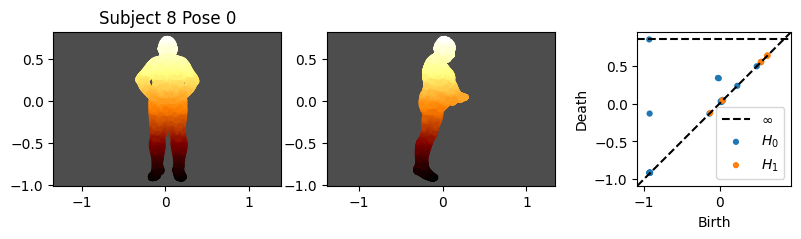

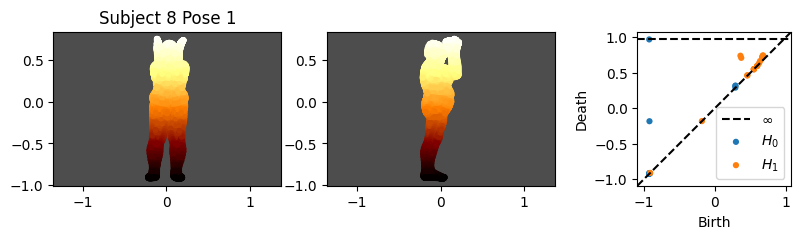

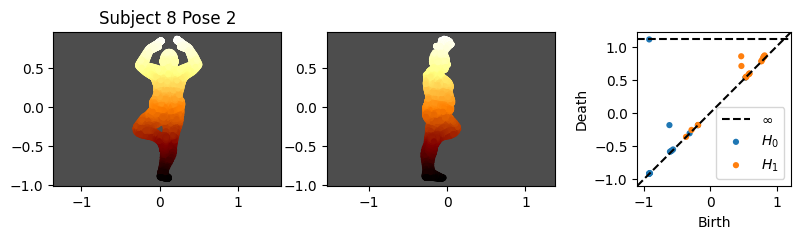

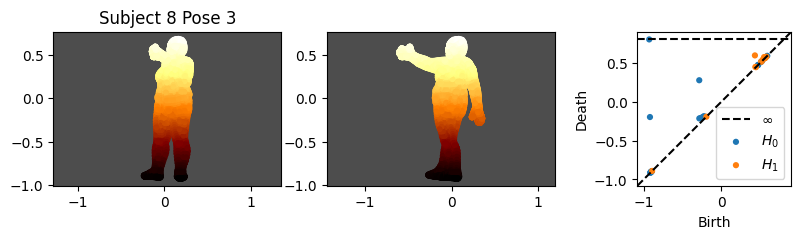

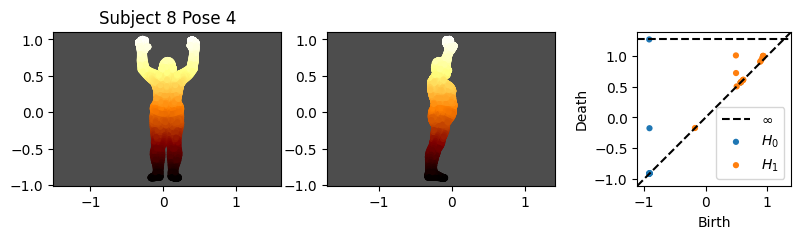

In [13]:
subjectNum = 8 # must be between 0 and 9 included

for poseNum in range(5):
  plotPoseAndPD(subjectNum, poseNum)

Explain the two H1's in...

In [14]:
ALPHA = 0.05
PIXEL_SIZE = 0.05

dgmsSub0_ = [ dgm[np.isfinite(dgm[:,1]),:] for dgm in dgmsSub0 ]
pimgrSub0 = PersistenceImager(pixel_size=pixel_size, kernel_params={'sigma': alpha * np.array([[1.0, 0.0], [0.0, 1.0]])})
pimgrSub0.fit(dgmsSub0_)
imgsSub0 = pimgrSub0.transform(dgmsSub0_)
imgsSub0_array = np.array([img.flatten() for img in imgsSub0])

imgs_array = imgsSub0_array

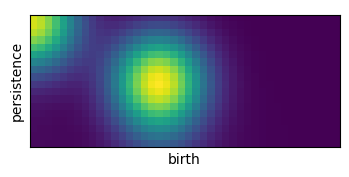

In [15]:
plt.figure(figsize=(4,2))
pimgrSub0.plot_image(imgsSub0[0])
plt.show()

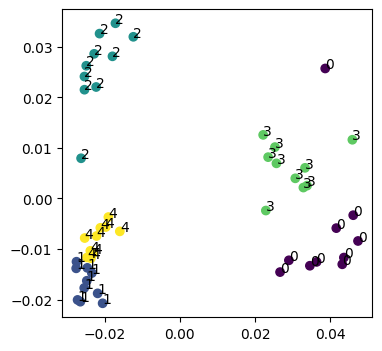

In [21]:
pca = PCA(n_components=2)
proj = pca.fit_transform(imgs_array)

plotProjection(proj)

Explain why 4 and 1 are hard to separate.

In [22]:
pimgrSub1 = PersistenceImager(pixel_size=pixel_size, kernel_params={'sigma': alpha * np.array([[1.0, 0.0], [0.0, 1.0]])})
dgmsSub1_ = [ dgm[np.isfinite(dgm[:,1]),:] for dgm in dgmsSub1 ]

pimgrSub1.fit(dgmsSub1_)
imgsSub1 = pimgrSub1.transform(dgmsSub1_)
imgsSub1_array = np.array([img.flatten() for img in imgsSub1])

imgs_array = np.column_stack((imgsSub0_array,imgsSub1_array))

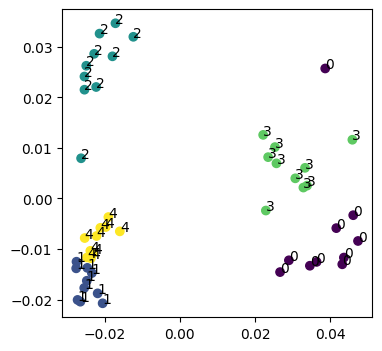

In [23]:
pca = PCA(n_components=2)
proj = pca.fit_transform(imgs_array)

plotProjection(proj)


Explain why 4 and 1 can be separated now